In [1]:
# Add the parent directory to sys.path
import sys, os
from pathlib import Path

current_directory = os.getcwd()
parent_directory = Path(current_directory).parent.parent
sys.path.insert(0, str(parent_directory))
sys.path

['c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv',
 '',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\Pythonwin']

# Connect to database

In [2]:
# Import the utils moudle
from scripts import utils

In [3]:
# Load the credentialsand connect to database
CREDENTIALS  = utils.load_environment_variables(parent_directory=parent_directory)
connection = utils.connect_to_database({"dbname": CREDENTIALS['DB_NAME'],
                                 "user": CREDENTIALS['USER'],
                                 "host": CREDENTIALS['host'],
                                 "port": CREDENTIALS['port']})

INFO:scripts.utils:Trying to load environment variables from c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis/.env
INFO:scripts.utils:Credentials loaded successfully
INFO:scripts.utils:Attempting to connect to the database
INFO:scripts.utils:Connection successful


In [4]:
# Load the db files into pandas dataframe and close the connection
table_name = 'xdr_data'
df = utils.load_data_from_db(conn=connection,
                       table_name=table_name)
utils.close_database_connection(conn=connection)

INFO:root:Executing query: SELECT * FROM xdr_data
c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis\scripts\utils.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
INFO:scripts.utils:Data loaded into DataFrame successfully
INFO:root:Database connection closed successfully


### Application Specific Engagement analysis

In [6]:
# Inspect dataset columns
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


##### Aggregate relevant metrics for each user

In [8]:
# Import the engagement utils module
from scripts import enagagement_utils

In [10]:
# Aggregate the data for each user per application total traffic
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
relevant_df = enagagement_utils.calculate_total_data_per_app(df=df,
                                                             applications=applications)
relevant_df.head()

INFO:root:Total data calculation and grouping successful


,MSISDN/Number,Social Media Total Data (Bytes),Google Total Data (Bytes),Email Total Data (Bytes),Youtube Total Data (Bytes),Netflix Total Data (Bytes),Gaming Total Data (Bytes),Other Total Data (Bytes)
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [23]:
# Convert Bytes data to GB
for application in applications:
    modified_df = enagagement_utils.convert_bytes_to_gigabytes(df=relevant_df,
                                                               bytes_column=f'{application} Total Data (Bytes)',
                                                               gb_column=f'{application} Total Data (GB)')
modified_df.head()

INFO:root:Conversion of 'Social Media Total Data (Bytes)' to gigabytes in column 'Social Media Total Data (GB)' successful
INFO:root:Conversion of 'Google Total Data (Bytes)' to gigabytes in column 'Google Total Data (GB)' successful
INFO:root:Conversion of 'Email Total Data (Bytes)' to gigabytes in column 'Email Total Data (GB)' successful
INFO:root:Conversion of 'Youtube Total Data (Bytes)' to gigabytes in column 'Youtube Total Data (GB)' successful
INFO:root:Conversion of 'Netflix Total Data (Bytes)' to gigabytes in column 'Netflix Total Data (GB)' successful
INFO:root:Conversion of 'Gaming Total Data (Bytes)' to gigabytes in column 'Gaming Total Data (GB)' successful
INFO:root:Conversion of 'Other Total Data (Bytes)' to gigabytes in column 'Other Total Data (GB)' successful


,MSISDN/Number,Social Media Total Data (GB),Google Total Data (GB),Email Total Data (GB),Youtube Total Data (GB),Netflix Total Data (GB),Gaming Total Data (GB),Other Total Data (GB)
0,3.360100e+10,0.002079,0.004088,0.001240,0.020139,0.025314,0.756661,0.360022
1,3.360100e+10,0.002478,0.004968,0.003081,0.011578,0.010451,0.111526,0.262363
2,3.360100e+10,0.002976,0.003207,0.002985,0.019868,0.018025,0.501822,0.467239
3,3.360101e+10,0.000261,0.009014,0.002128,0.006498,0.001809,0.364265,0.032857
4,3.360101e+10,0.002713,0.017229,0.003078,0.038681,0.045823,1.224501,0.749533


##### calculate top 10 users per app

In [28]:
top_10_users_per_app = {}
for application in applications:
    top_10_users_per_app[application] = modified_df[['MSISDN/Number',
                                                  f'{application} Total Data (GB)']].sort_values(by= f'{application} Total Data (GB)',
                                                                                                    ascending=False).head(10)
for app, data in top_10_users_per_app.items():
    print(f'Top 10 users for {app}')
    print(f'{data}\n')


Top 10 users for Social Media
        MSISDN/Number  Social Media Total Data (GB)
13526    3.362632e+10                      0.040396
92923    3.376054e+10                      0.037051
37052    3.365973e+10                      0.032980
6437     3.361489e+10                      0.026351
13180    3.362578e+10                      0.025272
65118    3.366716e+10                      0.022583
106137   3.378632e+10                      0.022328
70960    3.366907e+10                      0.022166
666      3.360313e+10                      0.021493
31331    3.365849e+10                      0.021420

Top 10 users for Google
        MSISDN/Number  Google Total Data (GB)
13526    3.362632e+10                0.141740
13180    3.362578e+10                0.132535
6437     3.361489e+10                0.119185
92923    3.376054e+10                0.114760
37052    3.365973e+10                0.108514
106137   3.378632e+10                0.102682
76363    3.367588e+10                0.102316
65118

##### Plot the top 3 most used apps per user

In [30]:
# Calculate total data for each app and extract the top 3 apps
total_data_per_app = modified_df[[f'{application} Total Data (GB)' for application in applications]].sum()
top_3_apps = total_data_per_app.nlargest(3)
top_3_apps


Gaming Total Data (GB)     59687.455566
Other Total Data (GB)      59562.039111
Youtube Total Data (GB)     3140.610003
dtype: float64

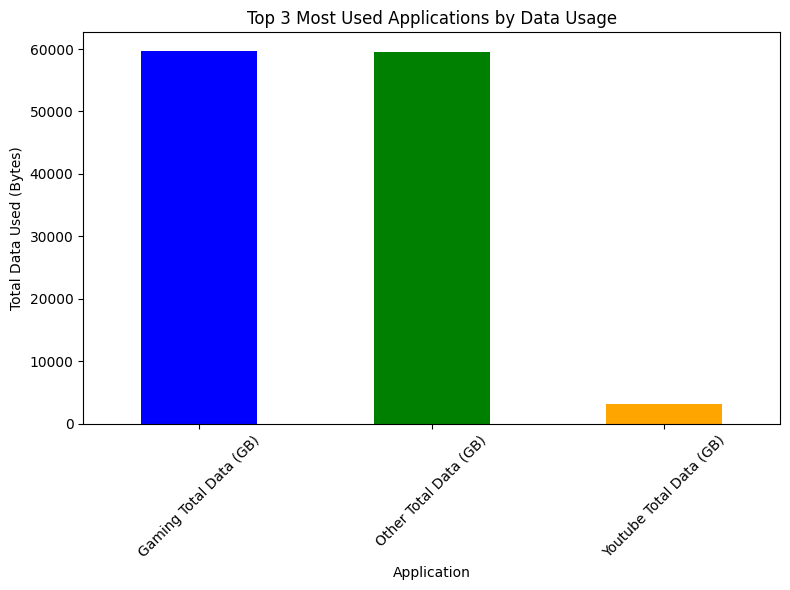

In [31]:
import matplotlib.pyplot as plt
# Create a bar chart
plt.figure(figsize=(8, 6))
top_3_apps.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Top 3 Most Used Applications by Data Usage')
plt.ylabel('Total Data Used (Bytes)')
plt.xlabel('Application')
plt.xticks(rotation=45)
plt.tight_layout()